## Homework4

In [488]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [489]:
frame = cv2.imread('sIMG_8253.JPG')
roi = frame[40:738, 90:900]
gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)

(Text(0.5, 1.0, 'roi'), ([], []), ([], []))

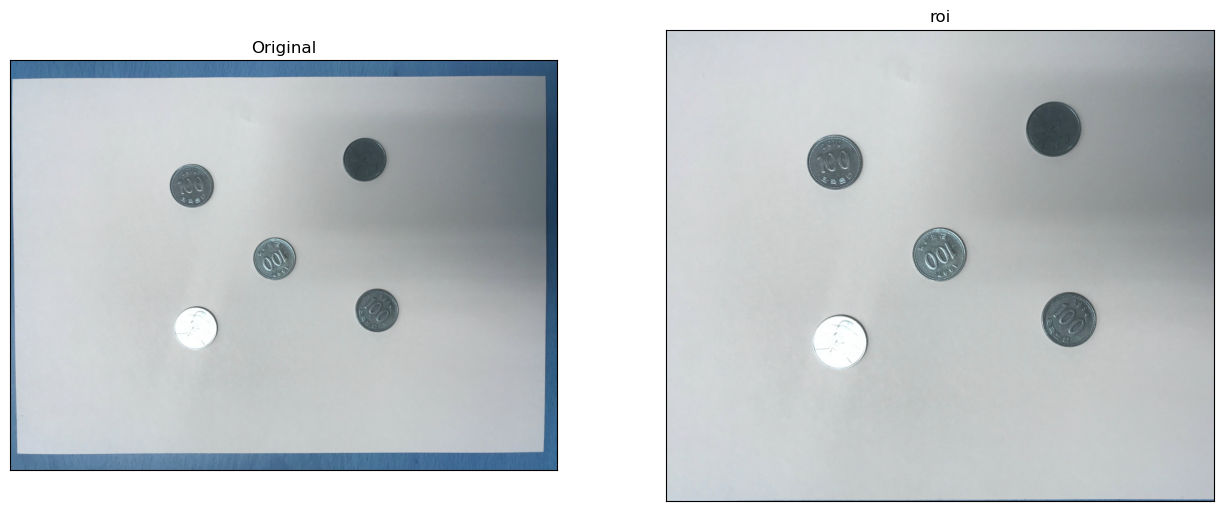

In [490]:
plt.figure(figsize=(24,8))
plt.subplot(1,3,1),plt.imshow(frame)
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(roi)
plt.title('roi'), plt.xticks([]), plt.yticks([])

In [491]:
gray_blur = cv2.GaussianBlur(gray, (15, 15), 0)
thresh = cv2.adaptiveThreshold(gray_blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
cv2.THRESH_BINARY_INV, 15, 2)

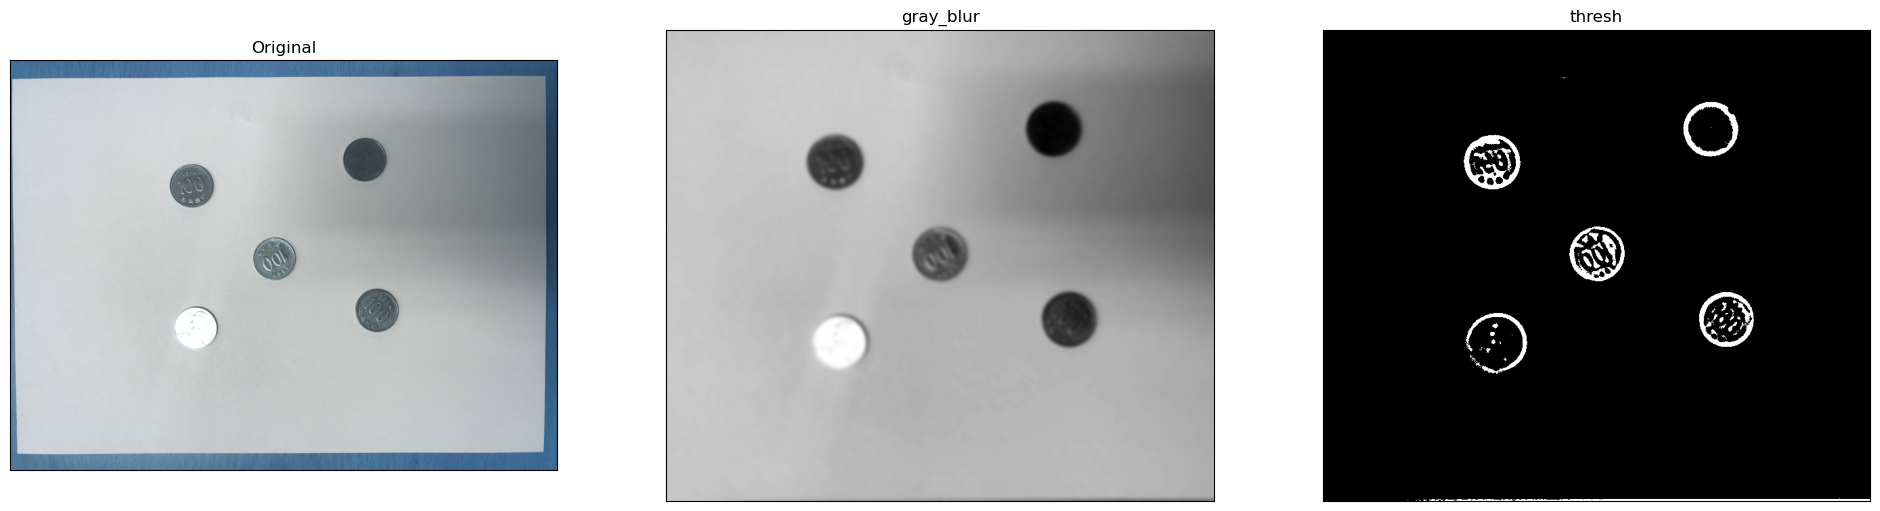

In [492]:
plt.figure(figsize=(24,8))
plt.subplot(1,3,1),plt.imshow(frame)
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(gray_blur,cmap="gray")
plt.title('gray_blur'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(thresh,cmap='gray')
plt.title('thresh'), plt.xticks([]), plt.yticks([])
plt.show()

In [493]:
kernel = np.ones((3, 3), np.uint8)
closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations=5)

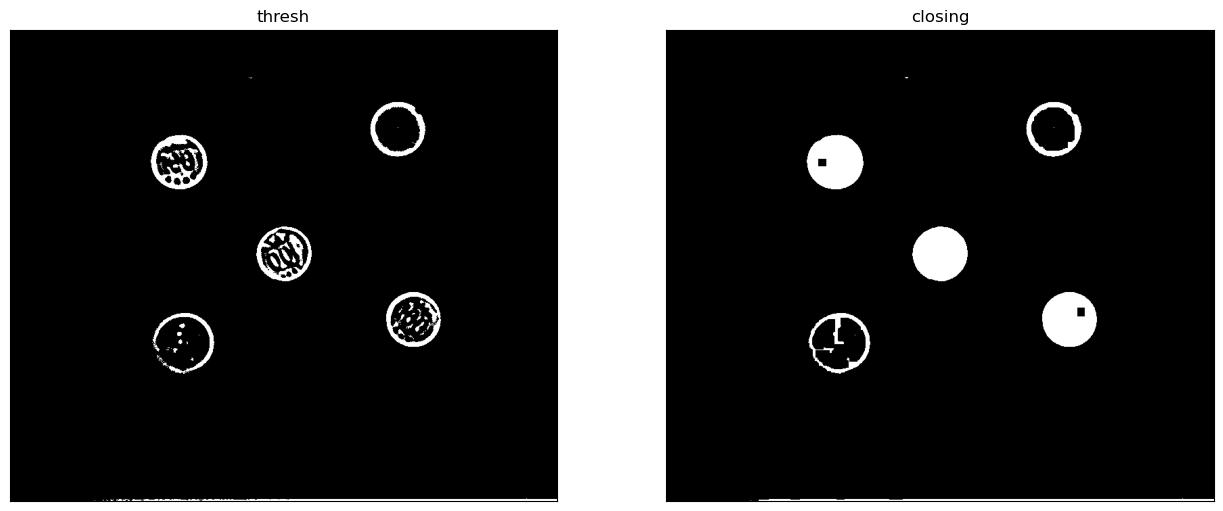

In [494]:
plt.figure(figsize=(24,8))
plt.subplot(1,3,2),plt.imshow(thresh,cmap="gray")
plt.title('thresh'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(closing,cmap="gray")
plt.title('closing'), plt.xticks([]), plt.yticks([])
plt.show()

In [495]:
cont_img = closing.copy()
contours, hierarchy = cv2.findContours(cont_img, cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

In [496]:
for cnt in contours:
    area = cv2.contourArea(cnt)
    if area < 4000 or area > 7000:
        continue
    if len(cnt) < 5:
        continue
    ellipse = cv2.fitEllipse(cnt)
    cv2.ellipse(roi, ellipse, (0,255,0), 2)

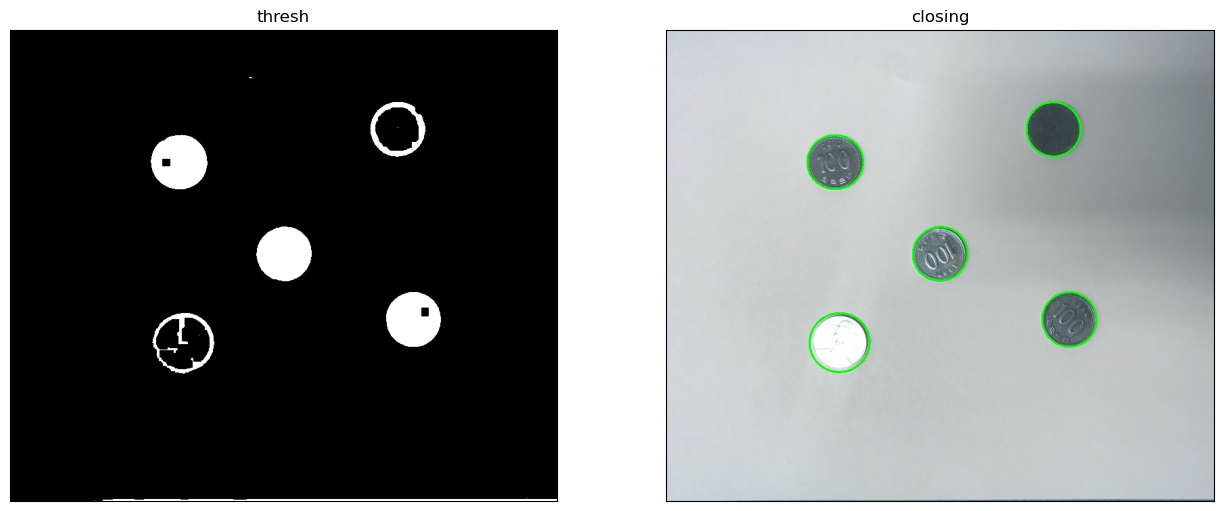

In [497]:
plt.figure(figsize=(24,8))
plt.subplot(1,3,2),plt.imshow(closing,cmap="gray")
plt.title('thresh'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(roi)
plt.title('closing'), plt.xticks([]), plt.yticks([])
plt.show()

In [499]:
cv2.imshow('final result', roi)
cv2.waitKey(0)
cv2.destroyAllWindows()